**Часть 3**
<br>**Предварительныя обработка**</br>

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [295]:
#!git clone https://github.com/R3naissnce/andan24_cian_analysis.git

In [367]:
df_with_log = pd.read_csv('/content/andan24_cian_analysis/raw_data/flats_with_loggia.csv')
df_without_log = pd.read_csv('/content/andan24_cian_analysis/raw_data/flats_no_loggia.csv')
df_with_log.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Трансстройинвест,developer,https://www.cian.ru/sale/flat/299589652/,Москва,sale,flat,2,24,1,43.5,-1,0,17768630.0,Очаково-Матвеевское,Мичуринский проспект,72А,Озёрная,ОМ
1,ФСК Агент,real_estate_agent,https://www.cian.ru/sale/flat/298210838/,Москва,sale,flat,13,44,1,60.9,-1,0,25500000.0,Хорошево-Мневники,к2/2,к2/2,Шелепиха,Сидней Сити ЖК
2,Группа Родина,developer,https://www.cian.ru/sale/flat/293200764/,Москва,sale,flat,6,13,1,33.9,-1,0,11048000.0,NaN,1-я Ватутинская,14к1,Ольховая,Russian Design District
3,SITRealty,real_estate_agent,https://www.cian.ru/sale/flat/300609717/,Москва,sale,flat,4,7,1,40.0,-1,0,9850000.0,NaN,Медовая Долина,2,Санино,Баркли Медовая долина
4,Новые Ватутинки,developer,https://www.cian.ru/sale/flat/301563956/,Москва,sale,flat,7,12,1,43.8,-1,0,10218540.0,NaN,NaN,5/2,Аэропорт Внуково,"Новые Ватутинки, мкр. Заречный"


In [368]:
df_with_log.shape

(4397, 18)

In [369]:
df_without_log.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Sminex,developer,https://www.cian.ru/sale/flat/293713671/,Москва,sale,flat,2,14,1,72.60,-1,0,133260000.0,Якиманка,NaN,NaN,Полянка,Лаврушинский ЖК
1,MHEstate - Элитная недвижимость,real_estate_agent,https://www.cian.ru/sale/flat/300932847/,Москва,sale,flat,10,14,1,65.20,-1,0,35000000.0,Мещанский,Гиляровского,50,Проспект Мира,NaN
2,MR Group,developer,https://www.cian.ru/sale/flat/301575583/,Москва,sale,flat,4,13,1,68.62,-1,0,86856437.0,Мещанский,м. Цветной бульвар,NaN,Цветной бульвар,Клубный дом Forum
3,Voller.one,real_estate_agent,https://www.cian.ru/sale/flat/297643594/,Москва,sale,flat,11,21,1,43.60,-1,0,18000000.0,Филевский парк,Береговой проезд,5к2,Фили,Фили Град
4,VESPER,developer,https://www.cian.ru/sale/flat/287317369/,Москва,sale,flat,5,21,1,65.90,-1,0,78259545.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky


In [370]:
df_without_log.shape

(4310, 18)

Объединим датафреймы в один, добавив новый категориальный признак 'has_loggia', содержащий в себе информацию о наличии лоджии в продаваемой квартире (1 - есть лоджия, 0 - нет лоджии). Сделаем это для удобства, чтобы в последствии обрабатывать один датафрейм, а не два одинаково и параллельно.

In [371]:
df_with_log['has_loggia'] = 1
df_without_log['has_loggia'] = 0

df = pd.concat([df_with_log, df_without_log], ignore_index=True)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               8523 non-null   object 
 1   author_type          8542 non-null   object 
 2   url                  8707 non-null   object 
 3   location             8707 non-null   object 
 4   deal_type            8707 non-null   object 
 5   accommodation_type   8707 non-null   object 
 6   floor                8707 non-null   int64  
 7   floors_count         8707 non-null   int64  
 8   rooms_count          8707 non-null   int64  
 9   total_meters         8707 non-null   float64
 10  price_per_month      8707 non-null   int64  
 11  commissions          8707 non-null   int64  
 12  price                8648 non-null   float64
 13  district             5918 non-null   object 
 14  street               6556 non-null   object 
 15  house_number         7583 non-null   o

Опишем признаки, имеющиеся в датасете:

*   author - автор объявления
*   author_type - категория автора
*   url - ссылка на объявление
*   location - локация квартиры
*   deal_type - тип сделки
*   accommodation_type - тип недвижимости
*   floor - этаж
*   floors_count - количество этажей в доме
*   rooms_count - количество комнат
*   total_meters - общая площадь
*   price_per_month - стоимость в месяц (арендная плата)
*   commissions - комиссия, взимаемая при заселении
*   price - стоимость квартиры
*   district - район
*   street - улица
*   house_number - номер дома
*   underground - ближайшая станция метро
*   residential_complex - название жилого комплекса
*   has_loggia - наличие лоджи


Убедимся, что при загрузке данных не произошли ошибки (в том числе с заполнением информации о сделке) и в датафреймах находится информация только об объявлениях о продажи квартир, а не сдачи в аренду. Для этого проверим есть ли в столбцах с данными о цене за месяц или комиссии значения, отличные от 0.


In [373]:
df[df['commissions'] != 0].shape[0]

0

In [374]:
df[df['price_per_month'] != -1].shape[0]

0

In [375]:
df[df['deal_type'] != 'sale'].shape[0]

0

Так как среди данных не было обнаружено объявлений о сдаче квартир в аренду, удалим соответсвующие столбцы из датафрейма и так же неиформативные для нас столбцы:
локация квартиры (мы рассматриваем только объявления по Москве),
тип недвижимости (фильтровали данные, чтобы информация была только о квартирах),
ссылка на объявление, автор, район, название жилого комплекса,
улица и номер дома (в нашей работе не понадобятся такие детали).




In [376]:
df.drop(['commissions', 'price_per_month', 'deal_type', 'location', 'accommodation_type', 'url', 'street', 'house_number', 'residential_complex', 'district', 'author'], axis=1, inplace=True)
df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,underground,has_loggia
0,developer,2,24,1,43.5,17768630.0,Озёрная,1
1,real_estate_agent,13,44,1,60.9,25500000.0,Шелепиха,1
2,developer,6,13,1,33.9,11048000.0,Ольховая,1
3,real_estate_agent,4,7,1,40.0,9850000.0,Санино,1
4,developer,7,12,1,43.8,10218540.0,Аэропорт Внуково,1


In [377]:
df.shape

(8707, 8)

Проведём проверку на дубликаты:

In [378]:
df.duplicated().sum()

2942

Изменим датафрейм, удалив дубликаты:

In [379]:
df = df.drop_duplicates(keep = 'first')

In [380]:
df.shape

(5765, 8)

Изучим количество пропущенных значений.

Важно отметить, что в документации сказано, что -1 используется в качестве пропуска, поэтому приведем все пропуски к одному виду, а после будем с ними работать.

In [381]:
df = df.replace(-1, np.nan)

In [382]:
df.isnull().sum()

author_type      89
floor            47
floors_count     47
rooms_count      70
total_meters      1
price            42
underground     143
has_loggia        0
dtype: int64

Удалим объявления, в которых не указан тип автора, так как это категориальная переменная, которую мы не можем угадывать для всех 89 пропусков.

In [383]:
df = df[df['author_type'].notnull()]

 Заметим, что  в некоторых объявлениях нет информации о ближайшей станции метро - это может значить отсутсвие метро рядом с квартирой, учтем это:

In [384]:
df['underground'] = df['underground'].fillna('Нет метро')

In [385]:
df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,underground,has_loggia
0,developer,2.0,24.0,1.0,43.5,17768630.0,Озёрная,1
1,real_estate_agent,13.0,44.0,1.0,60.9,25500000.0,Шелепиха,1
2,developer,6.0,13.0,1.0,33.9,11048000.0,Ольховая,1
3,real_estate_agent,4.0,7.0,1.0,40.0,9850000.0,Санино,1
4,developer,7.0,12.0,1.0,43.8,10218540.0,Аэропорт Внуково,1


In [386]:
df.shape

(5676, 8)

In [387]:
df.isnull().sum()

author_type      0
floor           47
floors_count    47
rooms_count     70
total_meters     1
price           42
underground      0
has_loggia       0
dtype: int64

В датасете всё еще остались пропуски. Точность данных для нас критична, так как в противном случае результаты моделей будут показывать искажённые результаты. В силу того, что доля этих пропусков совсем небольшая(<1%) - удалим их.

In [388]:
df = df[(df['floor'].notnull()) & (df['rooms_count'].notnull()) & (df['price'].notnull())]

df.isnull().sum()

author_type     0
floor           0
floors_count    0
rooms_count     0
total_meters    0
price           0
underground     0
has_loggia      0
dtype: int64

Сразу заметим, что попытки анализировать этаж и максимальный этаж в вакууме будут неуспешными - поэтому сразу добавим новый признак: доля от максимального этажа. Посчитаем по формуле:

> floor_rate = floor/floors_count




In [389]:
df["floor_rate"] = round(df["floor"]/df["floors_count"], 3)

df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,underground,has_loggia,floor_rate
0,developer,2.0,24.0,1.0,43.5,17768630.0,Озёрная,1,0.083
1,real_estate_agent,13.0,44.0,1.0,60.9,25500000.0,Шелепиха,1,0.295
2,developer,6.0,13.0,1.0,33.9,11048000.0,Ольховая,1,0.462
3,real_estate_agent,4.0,7.0,1.0,40.0,9850000.0,Санино,1,0.571
4,developer,7.0,12.0,1.0,43.8,10218540.0,Аэропорт Внуково,1,0.583


Также, рассматривать цены на квартиры можно не только в вакууме, но и в совокупности с еще одним показателем - цена за кв. м.(в миллионах). Посчитаем по формуле:


> price_per_m2 = price/total_meters



In [390]:
df["price_per_m2"] = round(df["price"]/df["total_meters"], 0)

df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,underground,has_loggia,floor_rate,price_per_m2
0,developer,2.0,24.0,1.0,43.5,17768630.0,Озёрная,1,0.083,408474.0
1,real_estate_agent,13.0,44.0,1.0,60.9,25500000.0,Шелепиха,1,0.295,418719.0
2,developer,6.0,13.0,1.0,33.9,11048000.0,Ольховая,1,0.462,325900.0
3,real_estate_agent,4.0,7.0,1.0,40.0,9850000.0,Санино,1,0.571,246250.0
4,developer,7.0,12.0,1.0,43.8,10218540.0,Аэропорт Внуково,1,0.583,233300.0


Напоследок, наведём немного красоты. Изменим формат значений в некоторых столбцах.

In [391]:
df['floor'] = df['floor'].astype(int)
df['floors_count'] = df['floors_count'].astype(int) ##Заменили float на int
df['rooms_count'] = df['rooms_count'].astype(int)
df['price'] = df['price'].astype(int)
df["price_per_m2"] = df["price_per_m2"].astype(int)

df.reset_index()
df.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,underground,has_loggia,floor_rate,price_per_m2
0,developer,2,24,1,43.5,17768630,Озёрная,1,0.083,408474
1,real_estate_agent,13,44,1,60.9,25500000,Шелепиха,1,0.295,418719
2,developer,6,13,1,33.9,11048000,Ольховая,1,0.462,325900
3,real_estate_agent,4,7,1,40.0,9850000,Санино,1,0.571,246250
4,developer,7,12,1,43.8,10218540,Аэропорт Внуково,1,0.583,233300


Так, мы подготовили датафрейм к дальнейшему анализу, EDA и построению гипотез, оставив только те объявления, в которых нет пропусков ни по одному из критически важных критериев.

In [392]:
df = df[df['total_meters'] >= 10]

In [393]:
df.shape

(5560, 10)

**Часть 4: Визуализация**


<p> Шаг 1. Заметим, что у объявлений по продажи квартир в Москве есть различные типы авторов. Посмотрим, какие авторы встречаются чаще всего и как соотносится количество вывешенных ими объявлений. </p>

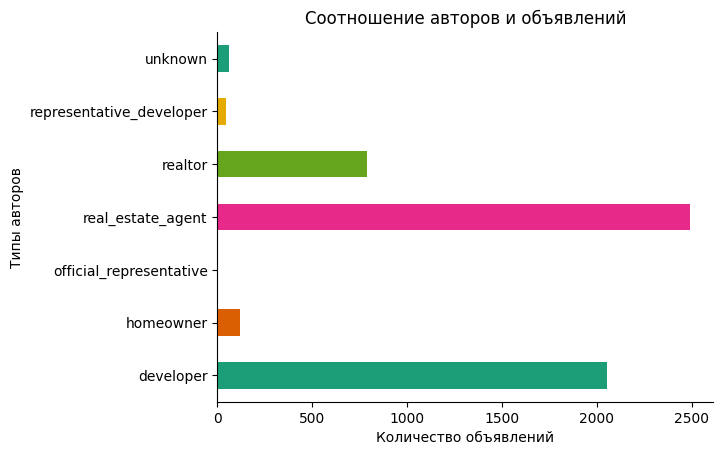

In [394]:
df.groupby('author_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Количество объявлений')
plt.ylabel('Типы авторов')
plt.title('Соотношение авторов и объявлений')
plt.show()

С помощью библиотеки seaborn мы получили более наглядный график соотношения количетсва авторов и их объявлений. Можно заметить, что больше всего вывешенных на сайт объявлений приходится на агенство недвижимости. Посмотрим точное количество.

In [395]:
real_estate_agent_counts = df['author_type'].value_counts()['real_estate_agent']
real_estate_agent_counts

2490

Кроме того, самое маленькое количество размещённых объявлений приходится на представителя управляющей компании (на графике даже не отображается такое маленькое число), что мы также посчитаем для наглядности.

In [396]:
official_representative_counts = df['author_type'].value_counts()['official_representative']
official_representative_counts

3

**Шаг 2.** <br>Изучим этажность домов в Москве.</br>

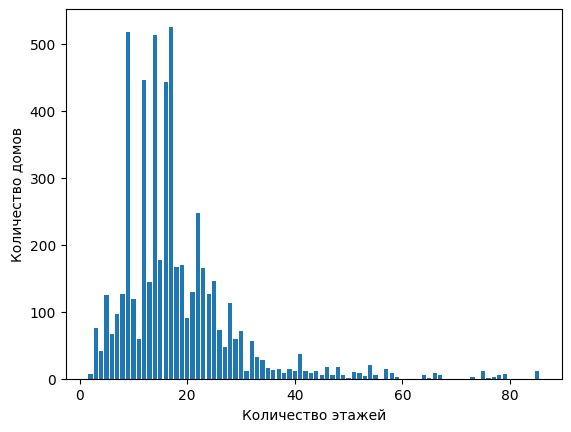

In [397]:
floors = df['floors_count'].value_counts()
plt.bar(floors.index, floors.values)
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

Благодаря визуализации несложно заметить, что наиболее часто сейчас квартиры продаются в домах с количеством этажей меньше 20. Разберем подробнее, какие дома наиболее популярны.

In [398]:
floors = floors.sort_values(ascending=False)
floors.head().to_frame()


,count
floors_count,
17,526
9,518
14,514
12,446
16,443


Таким образом, детализируя информацию, которую демонстрирует график, оказалось, что наиболее популярные домами в Москве, где продаются квартиры, имеют 17, 9 или 14 этажей.
<br>Также интересно, сколько этажей в наиболее высоком доме, где можно купить квартиру. Судя по графику, это значение слегка превышает 80, уточним эту инфоомацию.</br>


In [399]:
df['floors_count'].max()

85

Интересно, целых 85 этажей. Мы решили найти информацию об этом здании. Оказалось, что это самый высокий строящийся жилой небоскреб в Москве — 85-этажный комплекс премиум-класса «Дом Дау» в ММДЦ «Москва-Сити», 340 м высотой. Здание планируют сдать в эксплуатацию во втором квартале 2027 года.

**Шаг 3**
<br>С этажностью домов разобрались, теперь посмотрим на каких этажах продаются квартиры. Есть ли возможность купить квартиру на самом высоком этаже (85-ом) или эти варианты уже были распроданы?</br>

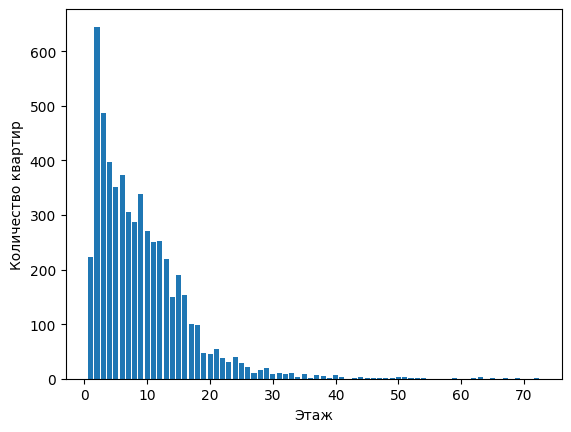

In [400]:
flat_floor = df['floor'].value_counts()
plt.bar(flat_floor.index, flat_floor.values)
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

  Во-первых, распределение этажей продаваемых квартир не похоже на нормальное.
<br>  Во-вторых, как можно заметить, чаще встречаются объявления о продаже квартир на низких этажах.</br>
  И в-третьих, всё-таки на 85 этаже купить квартиру в Москве на Циане не представляется возможным.

Рассмотрим подробнее, объявлений о продажи квартир на каких этажах в Москве больше всего?

In [401]:
flat_floor = flat_floor.sort_values(ascending=False)
flat_floor.head().to_frame()

,count
floor,
2,645
3,487
4,398
6,373
5,351


Таким образом, чаще всего квартиры пытаются продать на 2-6 этажах. Можем объяснить это тем, что низкие этажи есть абсолютно во всех домах, в то время как более высокие - только в зависимости от этажности дома. При этом, заметим, что первый этаж не является таким популярным. Мы предполагаем, что это связано с тем, что в современное время зачастую на 1 этаже располагаются магазины и т. д.

Интересно, а если не 85 этаж, то на каком самом высоком этаже возможно купить квартиру в Москве на Циане? По графику можно предположить, что это 72 этаж, но хотелось бы детально проверить.

In [402]:
df['floor'].max()

72

Этаж по графику был определен нами верно. Таким образом, несмотря на то, что максимальный этаж жилого дома, в котором можно приобрести квартиру 85ый, на данный момент на Циане присутствуют объявления только до 72 этажа.

**Шаг 4.**
Предлагаем теперь рассмотреть, существует ли зависимость цены на квартиру от этажа, на котором она располагается. Для этого построим диаграмму рассеивания. Действительно ли этаж влияет на стоимость квартиры?

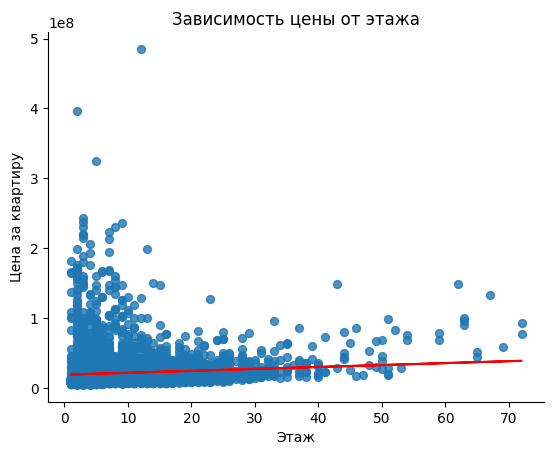

In [403]:
df.plot(kind='scatter', x='floor', y='price', s=32, alpha=0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Этаж')
plt.ylabel('Цена за квартиру')
plt.title('Зависимость цены от этажа')
z = np.polyfit(df['floor'], df['price'], 1)
y_hat = z[0] * df['floor'] + z[1]
plt.plot(df['floor'], y_hat, color='red')
plt.show()

По графику можно заметить, что наблюдается положительная тенденция, несмотря на некоторое количетво выбросов. То есть, цена на квартиру действительно повышается с увеличением этажа. Но ведь в представленной диаграмме учитываются общие цены как на однокомнатные, так и на двух и трёхкомнатные квартиры. Данный факт немного мешает корректно оценить зависимость, поэтому воспользуемся ценой за квадратный метод на следующем графике.

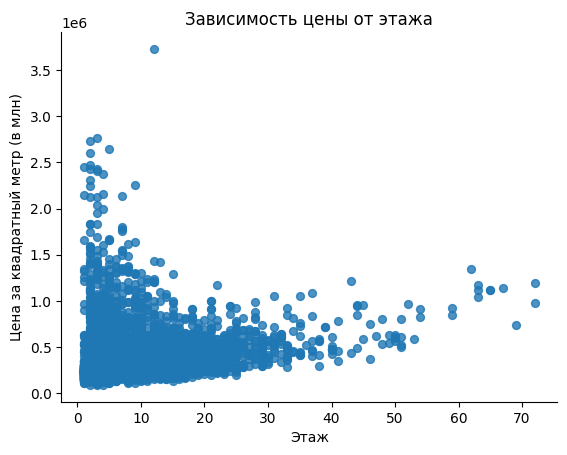

In [404]:
df.plot(kind='scatter', x='floor', y='price_per_m2', s=32, alpha=0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Этаж')
plt.ylabel('Цена за квадратный метр (в млн)')
plt.title('Зависимость цены от этажа')
plt.show()

Итак, положительная тенденция роста цен за квадратный метр с увеличением этажа действительно подтверждается. Тем не менее, выбросы в данных не дают чётко рассмотреть общую картину. Стоит проверить их наличие с помощью ящика с усами и подкорректировать.

**Шаг 4.1** <br>Работа с выбросами</br>

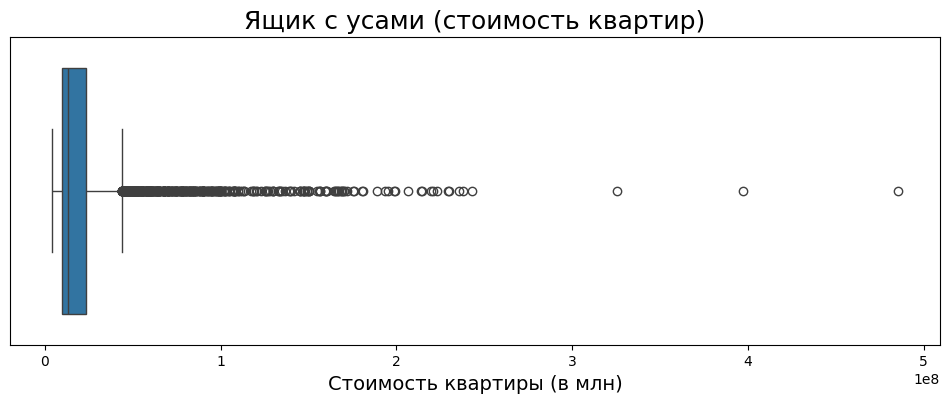

In [405]:
plt.figure(figsize = (12,4))
plt.title('Ящик с усами (стоимость квартир)', fontsize = 18)
plt.xlabel('Стоимость квартиры (в млн)', fontsize = 14)
sns.boxplot(df['price'], orient = 'h')
plt.yticks([]);

In [406]:
med = df['floor'].median()
Q1, Q3 = df['floor'].quantile([0.25, 0.75])
IQR = Q3 - Q1

# Задаём надёжные границы с IQR
bottom, top = med - 1.5*IQR, med + 1.5*IQR

# Отсеиваем на основе заданных границ
df_clean_floor = df[(df['floor'] >= bottom) & (df['floor'] <= top)]

In [407]:
df_clean_floor.shape

(5143, 10)

In [408]:
med = df_clean_floor['price'].median()
Q1, Q3 = df_clean_floor['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1

# Задаём надёжные границы с IQR
bottom, top = med - 1.5*IQR, med + 1.5*IQR

# Отсеиваем на основе заданных границ
df_clean_floor_price = df[(df['price'] >= bottom) & (df['price'] <= top)]

In [409]:
df_clean_floor_price.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,underground,has_loggia,floor_rate,price_per_m2
0,developer,2,24,1,43.5,17768630,Озёрная,1,0.083,408474
1,real_estate_agent,13,44,1,60.9,25500000,Шелепиха,1,0.295,418719
2,developer,6,13,1,33.9,11048000,Ольховая,1,0.462,325900
3,real_estate_agent,4,7,1,40.0,9850000,Санино,1,0.571,246250
4,developer,7,12,1,43.8,10218540,Аэропорт Внуково,1,0.583,233300


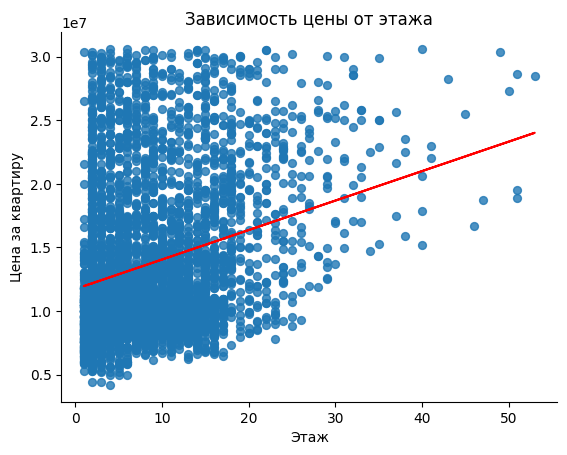

In [410]:
df_clean_floor_price.plot(kind='scatter', x='floor', y='price', s=32, alpha=0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Этаж')
plt.ylabel('Цена за квартиру')
plt.title('Зависимость цены от этажа')
z = np.polyfit(df_clean_floor_price['floor'], df_clean_floor_price['price'], 1)
y_hat = z[0] * df_clean_floor_price['floor'] + z[1]
plt.plot(df_clean_floor_price['floor'], y_hat, color='red')
plt.show()

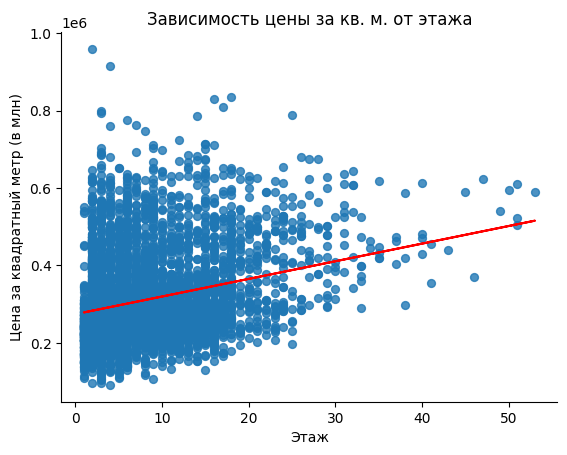

In [411]:
df_clean_floor_price.plot(kind='scatter', x='floor', y='price_per_m2', s=32, alpha=0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Этаж')
plt.ylabel('Цена за квадратный метр (в млн)')
plt.title('Зависимость цены за кв. м. от этажа')
z = np.polyfit(df_clean_floor_price['floor'], df_clean_floor_price['price_per_m2'], 1)
y_hat = z[0] * df_clean_floor_price['floor'] + z[1]
plt.plot(df_clean_floor_price['floor'], y_hat, color='red')
plt.show()

Теперь используемые нами данные освобождены от выбросов, и мы можем видеть уже ясную картину. Судя по линии тренда на диаграмме, можно теперь точно сказать, что чем выше этаж, тем более дорогим будет квадратный метр за квартиру. Можно объяснить данное явление тем фактом, что на верхних этажах более презентабельный вид, а также меньше шума доходит с двора и проезжей части.

**Шаг 5**
<br>Корреляция</br>
Рассмотрим, как числовые признаки коррелируют между собой, для этого построим корреляционную матрицу.

<Axes: >

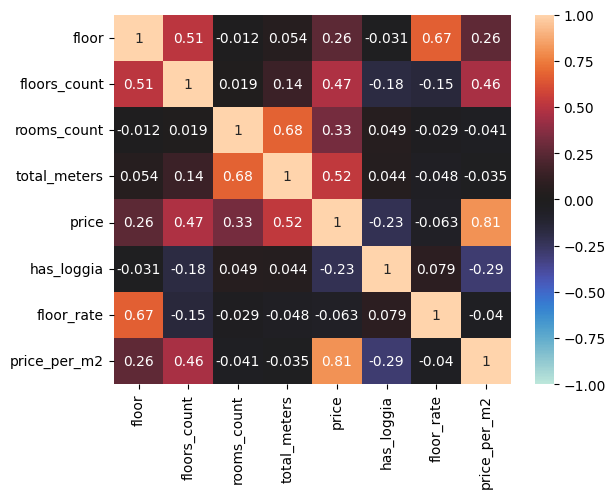

In [412]:
corr_m = sns.heatmap(df_clean_floor_price.corr(numeric_only = True), annot = True, vmin=-1, vmax=1, center= 0)
corr_m

Заметим, что наличие лоджии было посчитано за числовой признак, хотя он им не является, поэтому удалим его из корреляционной матрицы.

In [413]:
num_features = df_clean_floor_price.select_dtypes(include=['number']).columns
df_num = df_clean_floor_price[num_features]

In [414]:
df_num.drop('has_loggia', axis=1, inplace=True)

<ipython-input-414-6fc1dc3e012f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('has_loggia', axis=1, inplace=True)


Итак, итоговая корреляционная матрица чиловых признаков:

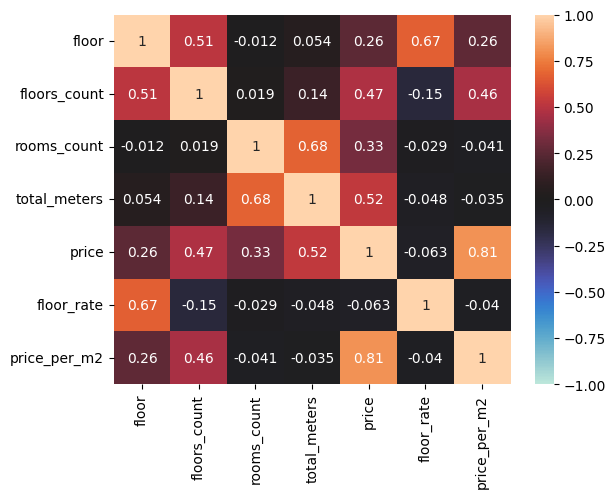

In [415]:
corr_m = sns.heatmap(df_num.corr(), annot = True, vmin=-1, vmax=1, center= 0)


Во многом признаки несильно зависят друг от друга, не включая цену. Тем не менее, можно заметить положительную взаимосвязь количества комнат в квартире и значение общей площади квартиры. Неудивительно, действительно зачастую, чем больше в квартире комнат, тем больше общая площадь.